In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
#from google.colab import files
#uploaded = files.upload()
dataset = pd.read_csv('winequality-white.csv', sep = ';' )
dataset.head()

Saving winequality-white.csv to winequality-white.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [0]:
# put quality scores into bins
bins = [0,4,7,10] # 3 range of scores: <5, 5 to 7, 8 to 10
catnames = ['Poor','Average','Excellent']
dataset['class'] = pd.cut(dataset['quality'], bins, labels=catnames)
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,Average
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,Average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,Average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,Average
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,Average
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,Average
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,Average


In [0]:
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides',
             'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
Y = dataset['class']
print(sorted(Counter(Y).items()))

[('Average', 4535), ('Excellent', 180), ('Poor', 183)]


In [0]:
# Undersampling the majority
rus = RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(X, Y)
print(sorted(Counter(Y_resampled).items()))
X_resampled

[('Average', 180), ('Excellent', 180), ('Poor', 180)]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([[ 6.9  ,  0.19 ,  0.39 , ...,  3.11 ,  0.66 , 10.8  ],
       [ 6.1  ,  0.21 ,  0.3  , ...,  3.27 ,  0.31 , 12.7  ],
       [ 6.5  ,  0.16 ,  0.33 , ...,  3.3  ,  0.39 , 11.4  ],
       ...,
       [ 7.1  ,  0.23 ,  0.24 , ...,  3.19 ,  0.78 , 10.   ],
       [ 6.   ,  0.11 ,  0.47 , ...,  2.91 ,  0.34 ,  9.3  ],
       [ 6.   ,  0.395,  0.   , ...,  3.37 ,  0.38 , 11.2  ]])

In [0]:
#y = dataset.loc[:,'quality'].values
x = StandardScaler().fit_transform(X_resampled)
pca = PCA(n_components=6)
pc = pca.fit_transform(x)
x

array([[ 0.0107865 , -0.86226933,  0.54746103, ..., -0.54658133,
         1.34427225,  0.01051504],
       [-0.82881116, -0.71724856, -0.17890004, ...,  0.48295054,
        -1.36462481,  1.44897301],
       [-0.40901233, -1.07980049,  0.06322032, ...,  0.67598777,
        -0.74544834,  0.46476493],
       ...,
       [ 0.22068591, -0.57222779, -0.66314076, ..., -0.03181539,
         2.27303695, -0.59515147],
       [-0.93376087, -1.44235242,  1.19311532, ..., -1.83349618,
        -1.13243363, -1.12510967],
       [-0.93376087,  0.62419357, -2.60010363, ...,  1.12640797,
        -0.8228454 ,  0.3133483 ]])

In [0]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.29268925 0.1570355  0.13163671 0.09158734 0.08378671 0.07242351]
0.8291590143121118


In [0]:
colors = 'rgbkcmy'

rmap = {
    'Excellent': 0,
    'Average': 1,
    'Poor': 2,
}

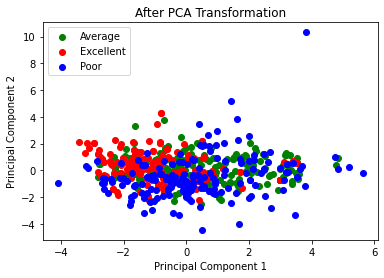

In [0]:
for name in np.unique(Y_resampled):
  plt.scatter(pc[Y_resampled==name, 0], pc[Y_resampled==name, 1],
                color=colors[rmap.get(name)],
                label =name)
plt.legend()
plt.title('After PCA Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()